In [1]:
import os
import cv2
import json
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from bert4keras.backend import keras, K

Using TensorFlow backend.


In [2]:
# 图像模型
preprocessing_image = keras.preprocessing.image
preprocess_input = keras.applications.resnet.preprocess_input
image_model = keras.applications.resnet.ResNet101(include_top=False, weights='imagenet', pooling='avg')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [12]:
# -*- coding: utf-8 -*-
def preprocess_data(files, train=True):
    """读取并整理VG的数据,提取区域特征.
    [
     {'region_feature'：[2048], key_words': str, 'caption': str},
     {'region_feature':[2048], key_words': str, 'caption': str},
     ...
    ]
    """

    for _, file in tqdm(enumerate(files)):
        if _ == 79:
            print(file)
        res = []
        
        try:
            image_data = json.load(open(folder+file), encoding='utf-8')
        except UnicodeDecodeError:
            print(folder+file)
            continue
        
        if train:
            if os.path.exists('./data/VisualGenome/train2016/'+file.replace('json', 'npy')):
                continue
        else:
            if os.path.exists('./data/VisualGenome/valid2016/'+file.replace('json', 'npy')):
                continue
            
        image_id = file.replace('json', 'jpg')
        img_path = './data/VisualGenome/VG_100K/%s' % image_id
            
        if not os.path.exists(img_path):
            continue
            
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        
        for region in image_data.values():
            r = {}
            
            region_img = img[region['y']:region['y']+region['height'], region['x']:region['x']+region['width']]
            if region_img.any():
                x = np.expand_dims(region_img, axis=0)
                x = preprocess_input(x)
                region_feature = image_model.predict(x)
                r['region_feature'] = np.array(region_feature)
            else:
                continue
                    
            r['caption'] = region["phrase"]
            
            keywords = ''
            for ob in region['objects']:
                keywords += ob['name'] + ' '
                r['keywords'] = keywords
                  
            res.append(r)
        
        if train:
            np.save('./data/VisualGenome/train2016/'+file.replace('json', 'npy'), res)
        else:
            np.save('./data/VisualGenome/valid2016/'+file.replace('json', 'npy'), res)

In [4]:
folder = './data/VisualGenome/annotation/regionfiles/'
files = os.listdir(folder)

In [5]:
split_idx = int(len(files)*0.8)
train_data, valid_data = files[:split_idx], files[split_idx:]

In [6]:
split_idx

85283

In [7]:
len(files)-85285

21319

In [13]:
preprocess_data(train_data, train=True)

0it [00:00, ?it/s]

2340877.json


81it [00:14,  5.72it/s]


KeyboardInterrupt: 

In [7]:
preprocess_data(valid_data, train=False)

 61%|██████    | 12912/21321 [00:06<00:04, 1983.58it/s]

./data/VisualGenome/annotation/regionfiles/tst_names.npy


100%|██████████| 21321/21321 [00:10<00:00, 1989.98it/s]


In [12]:
folder = './data/VisualGenome/train/'
files = os.listdir(folder)
data = np.load(folder+files[0], allow_pickle=True)

In [29]:
region = test_img['1382']
region

{'objects': [{'object_id': 1058498,
   'name': 'clock',
   'attributes': ['green'],
   'x': 422,
   'y': 63,
   'w': 77,
   'h': 363}],
 'relationships': [],
 'region_id': 1382,
 'width': 82,
 'height': 139,
 'image_id': 1,
 'phrase': 'the clock is green in colour',
 'y': 57,
 'x': 421}

In [13]:
image_data = json.load(open('./data/VisualGenome/region_descriptions.json'), encoding='utf-8')

In [3]:
folder = './data/VisualGenome/annotation/regionfiles/'
files = os.listdir(folder)

In [28]:
for file in files:
    if file == '1.json':
        print('True')
        test_img = json.load(open(folder+file), encoding='utf-8')

True


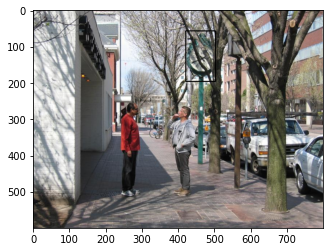

In [30]:
img = './data/VisualGenome/VG_100K/1.jpg'
im = cv2.imread(img)
# 把区域圈出来
cv2.rectangle(im, (region['x'], region['y']), (region['x']+region['width'], region['y']+region['height']), (0, 0, 0), 2)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

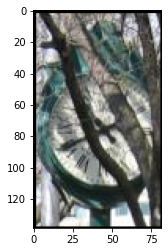

In [31]:
egion_img = cv2.cvtColor(im[region['y']:region['y']+region['height'], region['x']:region['x']+region['width']],cv2.COLOR_BGR2RGB)
plt.imshow(region_img)

In [13]:
npy_data = np.load('./data/VisualGenome/train2016/2330198.npy', allow_pickle=True)

In [14]:
npy_data

array([{'caption': 'the zebra is looking down', 'keywords': 'zebra ', 'region_feature': array([[4.6123940e-01, 3.2224612e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0804039e+00, 2.5111854e-03]], dtype=float32)},
       {'caption': 'the zebra has stripes', 'keywords': 'zebra stripe ', 'region_feature': array([[1.3132919 , 3.5083878 , 0.        , ..., 0.        , 0.42828622,
        0.10584779]], dtype=float32)},
       {'caption': 'the head of a zebra', 'keywords': 'head zebra ', 'region_feature': array([[0.02406428, 5.9607315 , 1.2309018 , ..., 0.        , 0.00695829,
        0.        ]], dtype=float32)},
       {'caption': 'the ear of a zebra', 'keywords': 'ear zebra ', 'region_feature': array([[0.34872553, 7.32046   , 0.01381747, ..., 0.7288703 , 1.0775088 ,
        0.3494197 ]], dtype=float32)},
       {'caption': 'the nose of a zebra', 'keywords': 'nose zebra ', 'region_feature': array([[0.       , 4.3413982, 0.       , ..., 2.177648 , 0.       ,
        0.       ]], dtype=f